# Plot Distribution

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import seaborn as sns

from tqdm import tqdm
%matplotlib inline

In [19]:
def plot_distribution(Json_fold):
    lists = os.listdir(Json_fold)
    scores = []
    label = []

    for path in tqdm(lists):
        
        if path.split('.')[-1]=="json":
            with open(os.path.join(Json_fold,path),'r') as load_f:
                load_dict = json.load(load_f)
            for image_key in ["attributes-image1","attributes-image2"]:
                attr_dict = load_dict[image_key]

                max_value = 0

                for key in attr_dict.keys():
                    if attr_dict[key][1]>max_value:
                        max_value = attr_dict[key][1]

                scores.append(max_value)
                label.append(load_dict["match"])

    lists = os.listdir(Json_fold)
    scores1 = []
    label1 = []

    for path in tqdm(lists):
        
        if path.split('.')[-1]=="json":
            with open(os.path.join(Json_fold,path),'r') as load_f:
                load_dict = json.load(load_f)
            similarity = load_dict["similarity"]
            
            scores1.append(similarity)
            label1.append(load_dict["match"])

    df = pd.DataFrame(np.array([scores+scores1,label+list(np.array(label1)+2)]).T)

    plt.figure(figsize=(13,10), dpi= 80)
    sns.violinplot(x=1, y=0, data=df, scale='width', inner='quartile')

    # Decoration
    plt.title('Distribution',fontproperties = 'Times New Roman', fontsize=40)
    plt.xticks(fontproperties = 'Times New Roman', size = 40)
    plt.yticks(fontproperties = 'Times New Roman', size = 40)
    plt.xticks([0,1,2,3], labels=['N-Most','T-Most','N','T'])
    plt.xlabel('Class',fontdict={'family' : 'Times New Roman', 'size'   : 40})
    plt.ylabel('Similarity',fontdict={'family' : 'Times New Roman', 'size'   : 40})
    plt.show()

100%|██████████| 2992/2992 [00:00<00:00, 17296.17it/s]


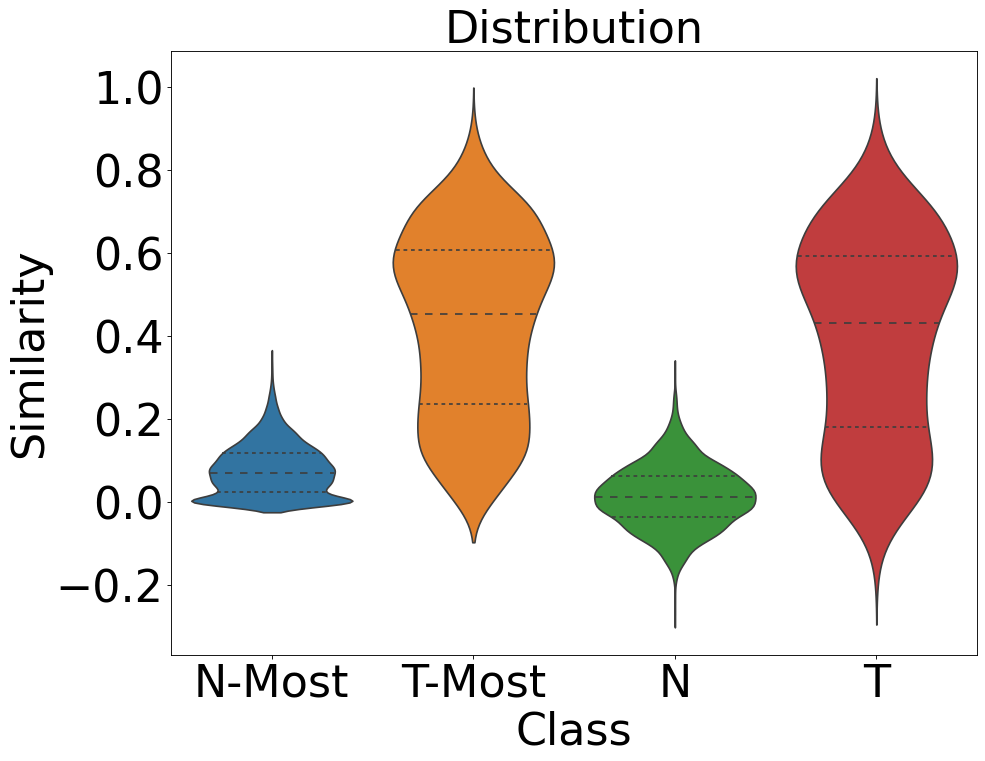

100%|██████████| 2992/2992 [00:00<00:00, 14647.00it/s]


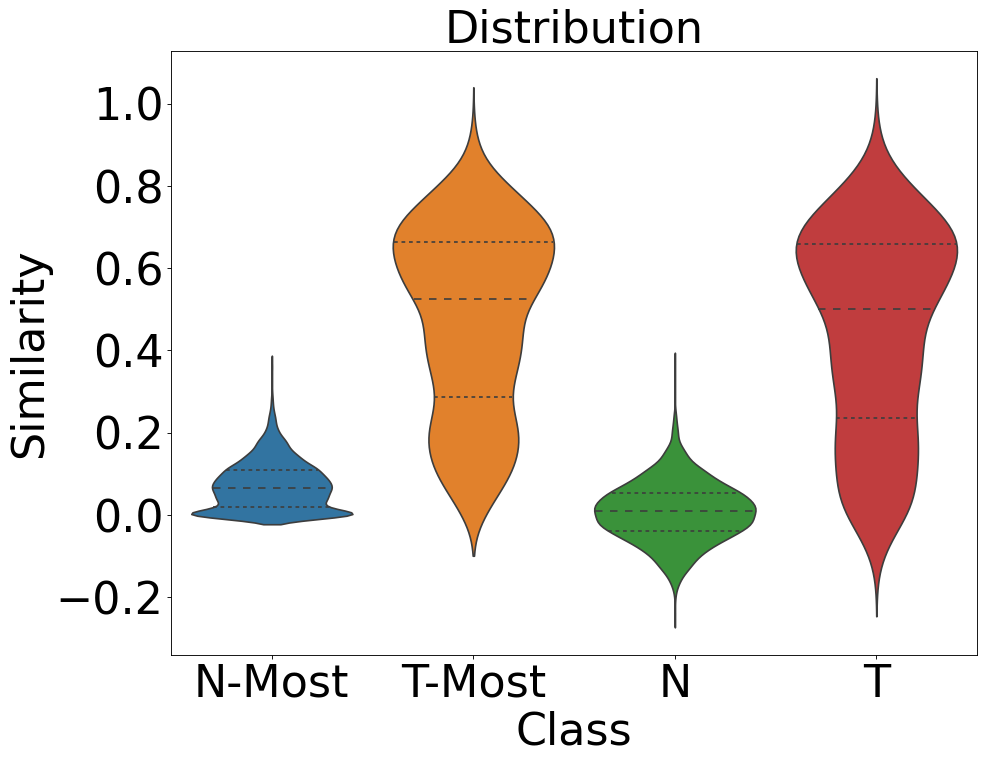

100%|██████████| 2992/2992 [00:00<00:00, 17017.74it/s]


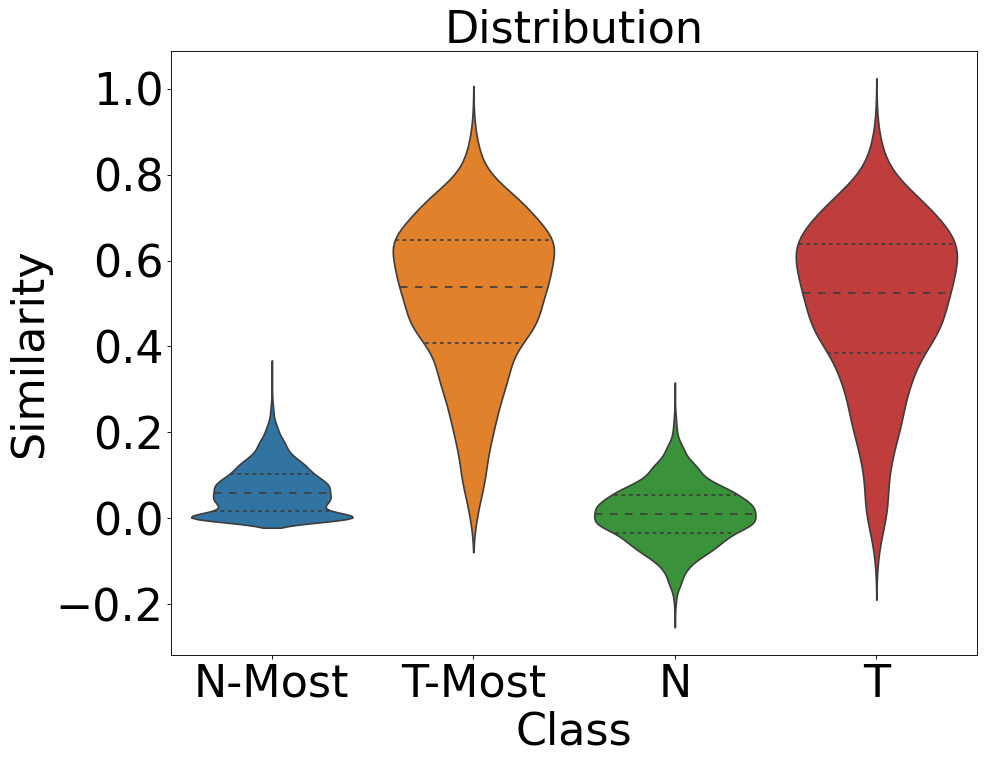

100%|██████████| 2992/2992 [00:00<00:00, 16904.20it/s]


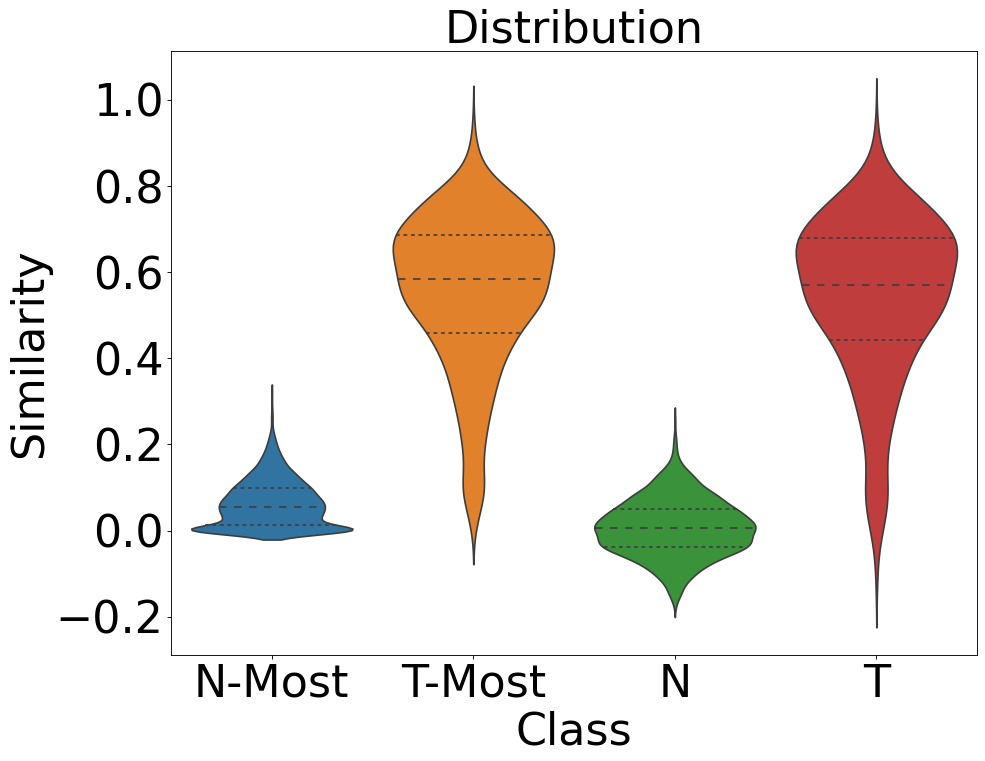

100%|██████████| 2992/2992 [00:00<00:00, 16919.13it/s]


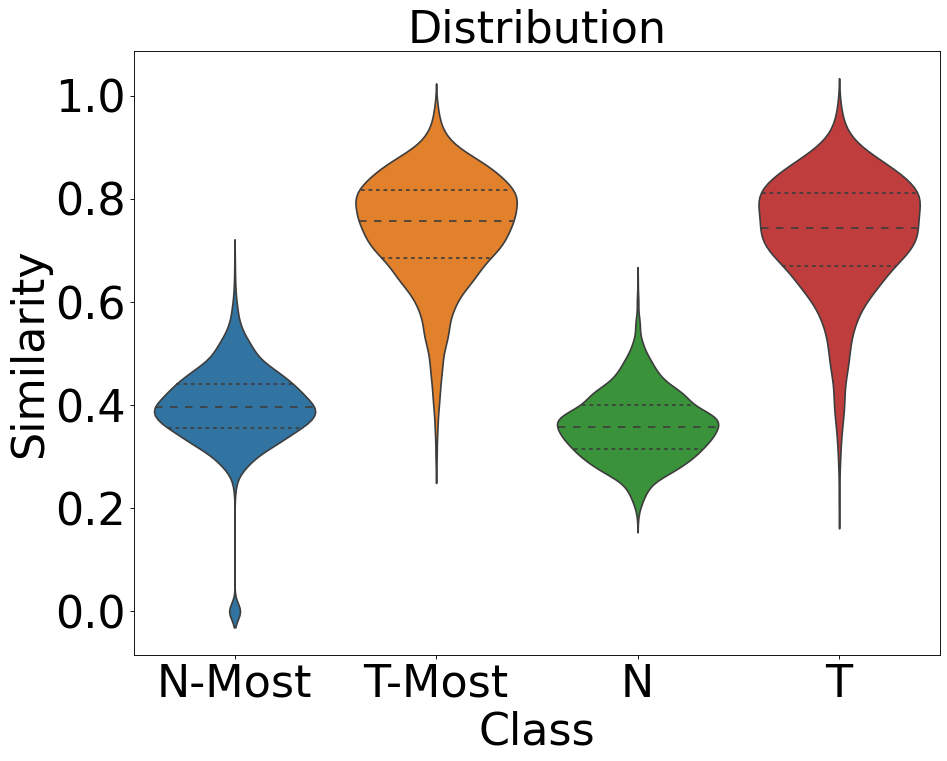

In [20]:
plot_distribution('./scores-group-Celeb-A-ArcFace-r50')
plot_distribution('./scores-group-Celeb-A-ArcFace-r100')
plot_distribution('./scores-group-Celeb-A-CosFace-r50')
plot_distribution('./scores-group-Celeb-A-CosFace-r100')
plot_distribution('./scores-group-CelebA-VGGFace2')

100%|██████████| 2990/2990 [00:00<00:00, 17463.22it/s]


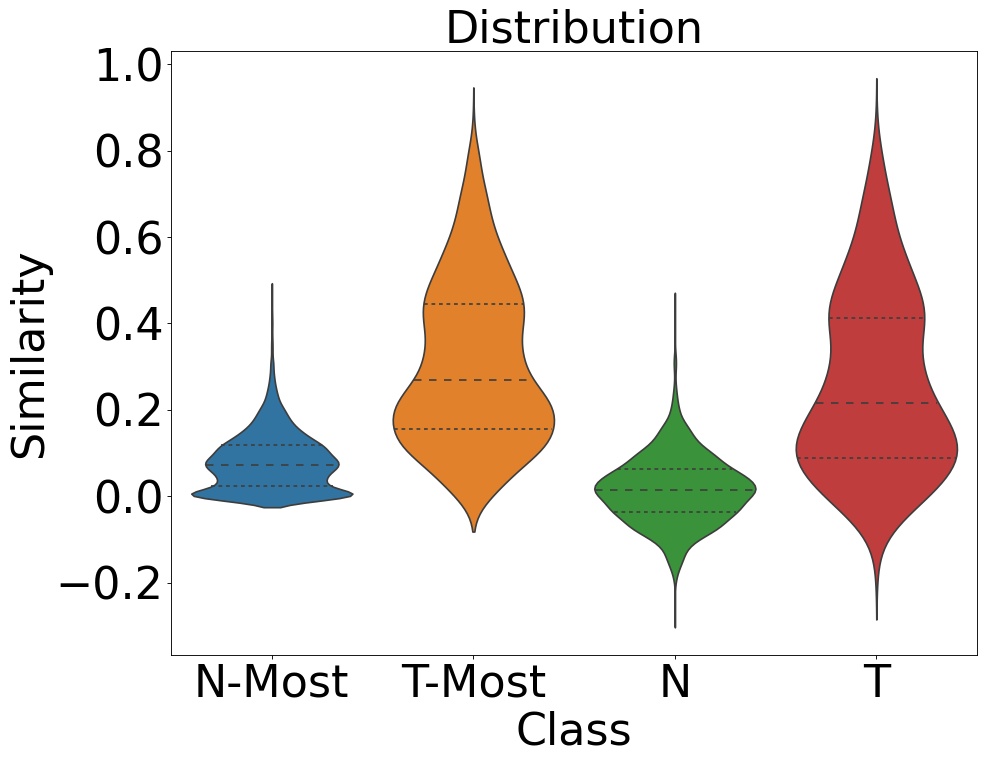

100%|██████████| 2990/2990 [00:00<00:00, 16838.49it/s]


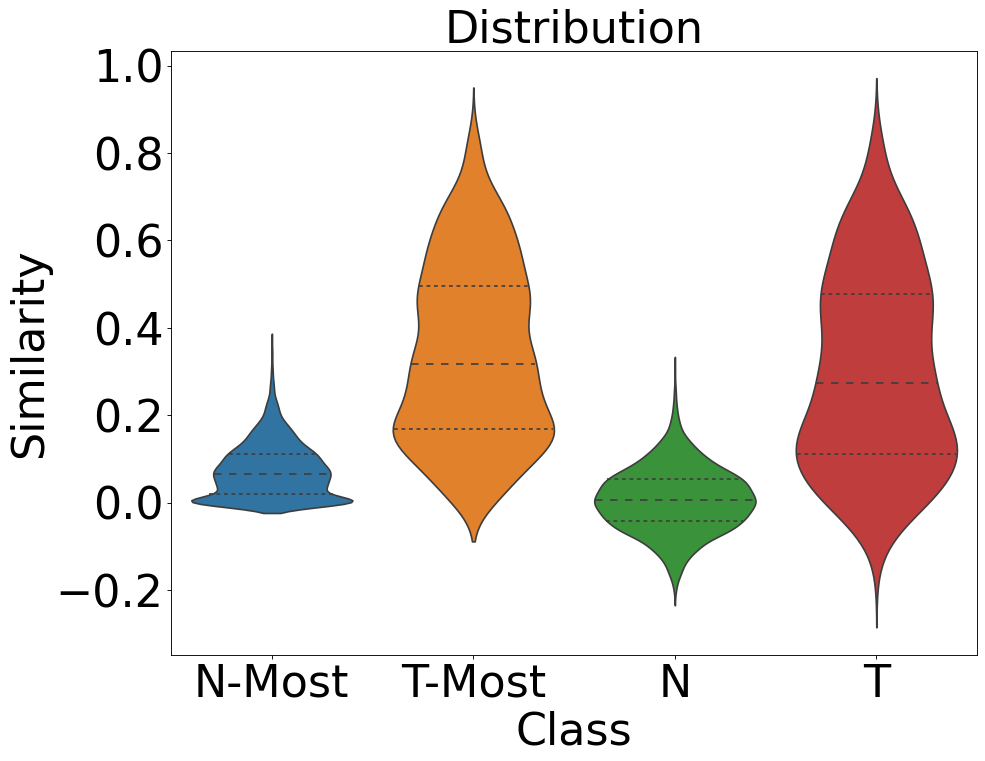

100%|██████████| 2990/2990 [00:00<00:00, 14628.50it/s]


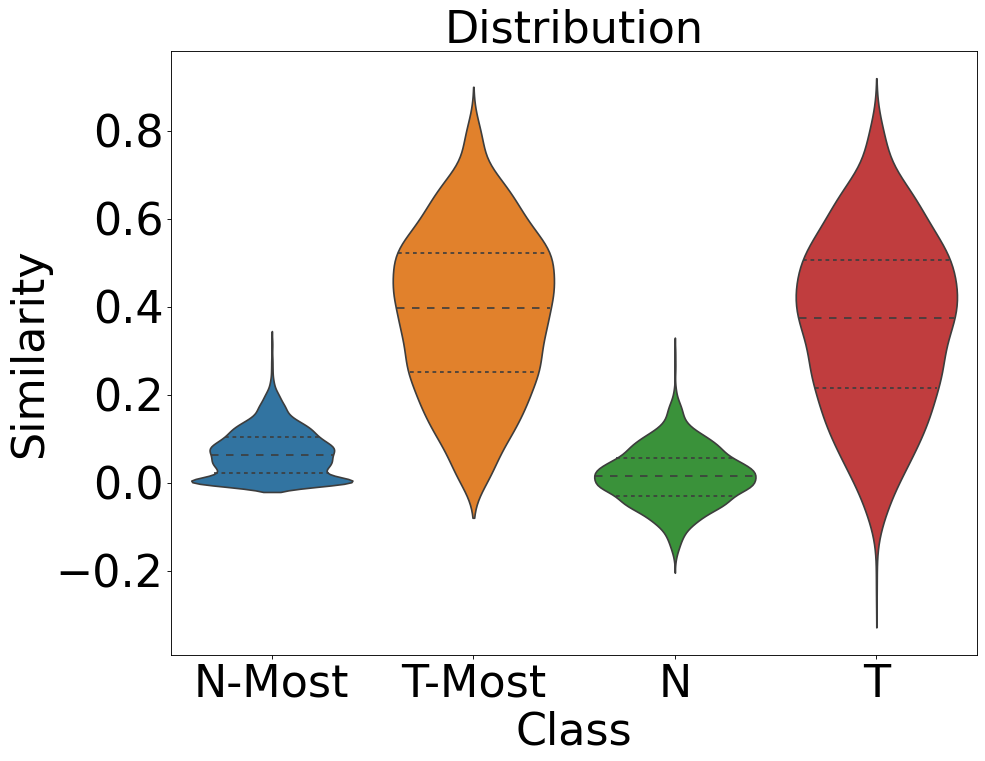

100%|██████████| 2990/2990 [00:00<00:00, 16488.47it/s]


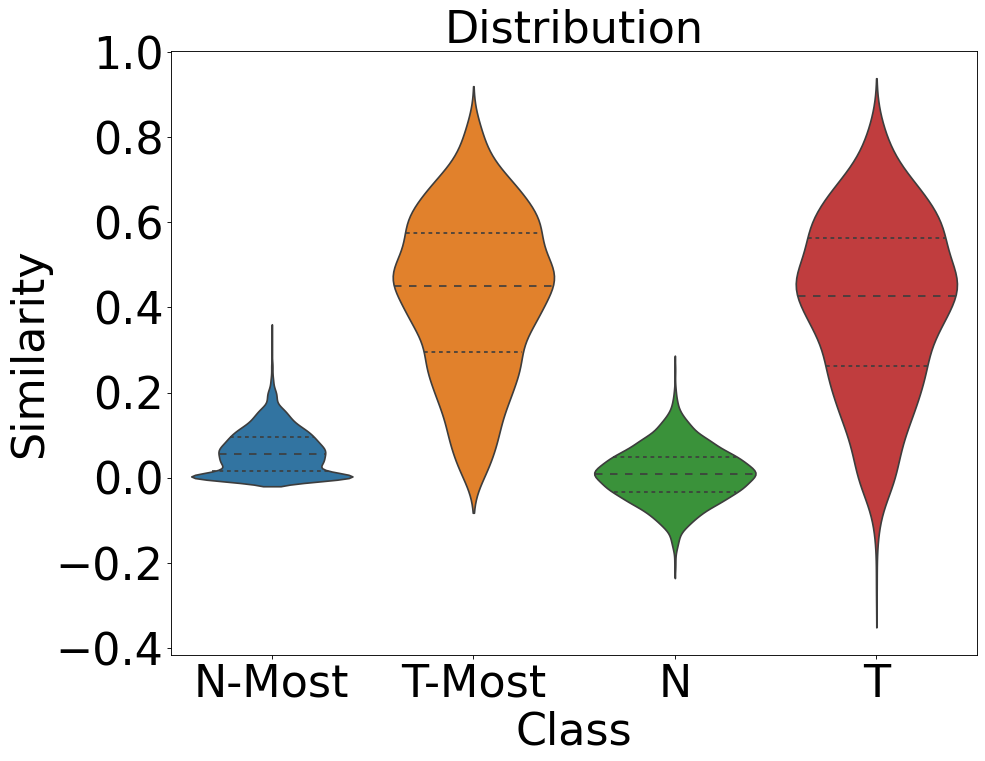

100%|██████████| 2991/2991 [00:00<00:00, 15559.08it/s]


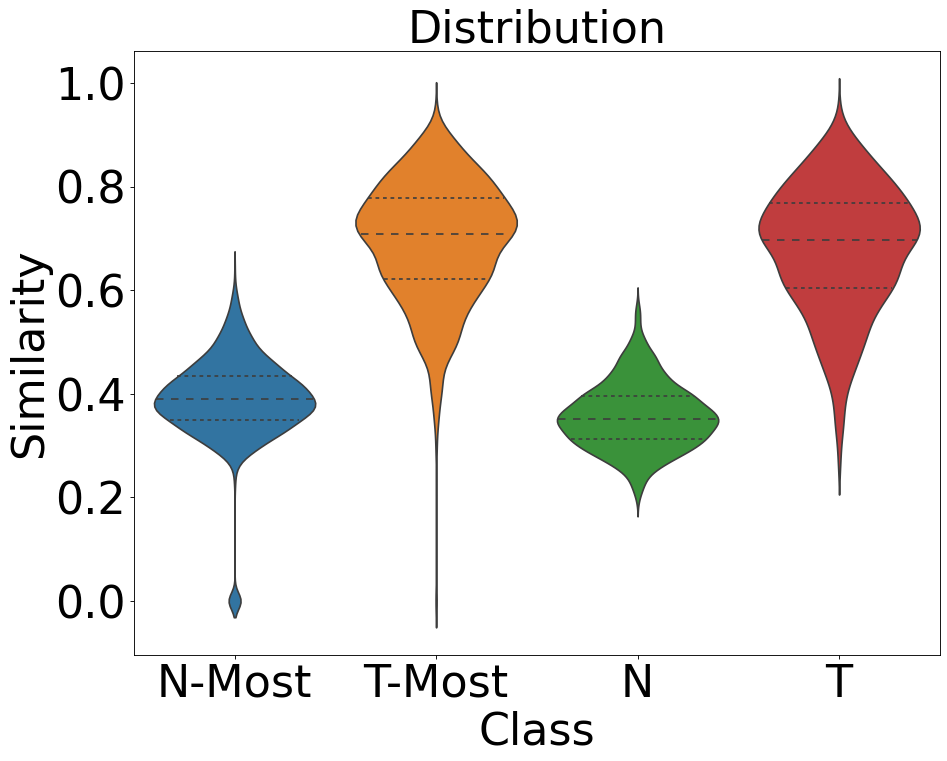

In [21]:
plot_distribution('./scores-group-VGGFace2-ArcFace-r50')
plot_distribution('./scores-group-VGGFace2-ArcFace-r100')
plot_distribution('./scores-group-VGGFace2-CosFace-r50')
plot_distribution('./scores-group-VGGFace2-CosFace-r100')
plot_distribution('./scores-group-VGGFace2-VGGFace2')

# Most

In [1]:
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline


<ipython-input-4-e995af44754f>:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,i)


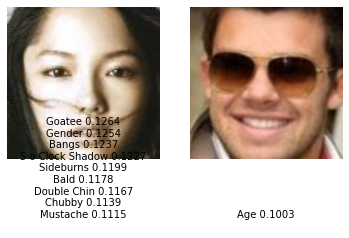

In [4]:
path = "./scores-group-Celeb-A-CosFace-r100/1.json"

attributes_name = [
    "Gender","Age","Race","Bald","Wavy Hair",
    "Receding Hairline","Bangs","Sideburns","Hair color","no beard",
    "Mustache","5 o Clock Shadow","Goatee","Oval Face","Square Face",
    "Round Face","Double Chin","High Cheekbones","Chubby","Obstructed Forehead",
    "Fully Visible Forehead","Brown Eyes","Bags Under Eyes","Bushy Eyebrows","Arched Eyebrows",
    "Mouth Closed","Smiling","Big Lips","Big Nose","Pointy Nose"
]

plt.figure()
plt.subplot(1,2,1)

if path.split('.')[-1]=="json":
    with open(path,'r') as load_f:
        load_dict = json.load(load_f)
    image1 = imread(load_dict["image-path1"])
    image2 = imread(load_dict["image-path2"])

    i = 1
    image = [image1,image2]
    for image_key in ["attributes-image1","attributes-image2"]:
        attributes = []

        attr_dict = load_dict[image_key]

        value = []
        matrix = np.zeros(30)

        for key in attr_dict.keys():
            matrix[int(key.split('_')[-1])] = attr_dict[key][1]
            if(attr_dict[key][1]>0.1):
                value.append(attr_dict[key][1])
        
        value.sort(reverse=True)

        title = ""

        for j in range(len(value)):
            index = np.where(matrix==value[j])[0][0]
            attributes.append([attributes_name[index],value[j]])
            title = title + attributes_name[index] + ' ' + '%.4f' % value[j] + '\n'

        

        plt.subplot(1,2,i)
        plt.axis('off')
        plt.title(title,size=10, y=-0.5)
        plt.imshow(image[i-1])
        i+=1
plt.show()

# Debug of top 5 attributes

In [1]:
import numpy as np
import cv2
import heapq
import json
import argparse
import os
import math
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tqdm import tqdm

In [2]:
attributes_name = [
    "Gender","Age","Race","Bald","Wavy Hair",
    "Receding Hairline","Bangs","Sideburns","Hair color","no beard",
    "Mustache","5 o Clock Shadow","Goatee","Oval Face","Square Face",
    "Round Face","Double Chin","High Cheekbones","Chubby","Obstructed Forehead",
    "Fully Visible Forehead","Brown Eyes","Bags Under Eyes","Bushy Eyebrows","Arched Eyebrows",
    "Mouth Closed","Smiling","Big Lips","Big Nose","Pointy Nose"
]

In [7]:
def similarity2distance(similarity):
    '''
    Convert similarity range [-1,1] to cosine distance [0,1]
        return a new similarity range [0,1], the value more close 
        to 1 that the face more similar.
    '''
    dist = np.arccos(similarity) / math.pi
    return 1-dist

In [20]:
def Top_5_attributes(path):
    # path = "./scores-group-Celeb-A-CosFace-r100/1.json"

    plt.figure()
    plt.subplot(1,2,1)

    if path.split('.')[-1]=="json":
        with open(path,'r') as load_f:
            load_dict = json.load(load_f)
        image1 = imread(load_dict["image-path1"])
        image2 = imread(load_dict["image-path2"])

        i = 1
        image = [image1,image2]
        for image_key, attribute_class in zip(["attributes-image1","attributes-image2"],["Attribute1-class","Attribute2-class"]):
            attr_dict = load_dict[image_key]
            attr_class = load_dict[attribute_class]

            save_location = np.array([
                0,0,0,1,1,
                1,1,1,0,1,
                1,1,1,1,1,
                1,1,1,1,1,
                1,1,1,1,1,
                1,1,1,1,1            
            ])

            jud = attr_class * save_location
            jud[jud != 0] = 2
            jud[jud == 0] = 1
            jud[jud == 2] = 0

            print(jud)

            value = np.array(list(attr_dict.values()))[:,-1]

            value = value * jud
            value[value==0]=-1

            print(value)
            index = heapq.nlargest(5,range(len(value)),value.__getitem__)
            value_convert = similarity2distance(np.array(value)[index])
            
            title = ""

            for id_,v in zip(index,value_convert.tolist()):
                
                title = title + attributes_name[id_] + ' ' + '%.4f' % v + '\n'

            plt.subplot(1,2,i)
            plt.axis('off')
            plt.title(title, size=10, y=-0.5)
            plt.imshow(image[i-1])
            i+=1

        attr_dict = load_dict["attributes-both-masked"]
        value = list(attr_dict.values())
        index = heapq.nlargest(5,range(len(value)),value.__getitem__)
        value_convert = similarity2distance(np.array(value)[index])

        title = "Similarity: "+"%.4f"%(1-math.acos(load_dict["similarity"])/math.pi)+"\n"
        
        for id_,v in zip(index,value_convert.tolist()):
            title = title + attributes_name[id_] + ' ' + '%.4f' % v + '\n'

        plt.suptitle(title,size=10)
    #plt.savefig(save_path)
    plt.show()
    plt.close()
    

In [21]:
path = "./Multi-ID-topk/scores-group-VGGFace2-test-CosFace-r50-topk-9/json/5.json"

[1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0]
[-0.04631578 -0.06335485  0.00390518 -1.         -1.         -0.0208526
 -1.         -1.         -0.06105268 -0.06380196 -1.         -1.
 -1.         -1.         -0.04801708 -1.         -0.00703257 -1.
 -0.11946349 -1.         -0.02543171 -0.03720164 -0.0565518  -0.04011061
 -1.         -1.         -1.         -1.         -0.06602532 -1.        ]
[1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1]
[-0.00507603 -0.01426632 -0.02551413 -1.         -1.         -1.
 -1.         -1.         -0.0277782  -0.07823855 -1.         -1.
 -1.         -1.         -1.         -1.         -0.00842547 -1.
 -1.         -1.         -1.         -1.          0.01282327 -1.
 -1.         -1.         -1.         -1.         -1.         -0.0765413 ]
<ipython-input-20-1e71c9168ffd>:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new i

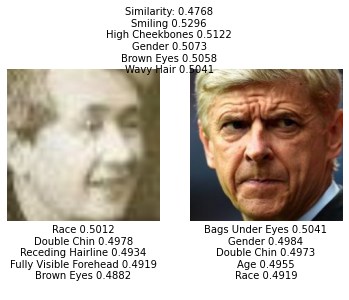

In [22]:
Top_5_attributes(path)

## Uncertainty

In [186]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [187]:
Face_attributes_name = np.array([
    "Gender","Age","Race","Bald","Wavy Hair",
    "Receding Hairline","Bangs","Sideburns","Hair color","no beard",
    "Mustache","5 o Clock Shadow","Goatee","Oval Face","Square Face",
    "Round Face","Double Chin","High Cheekbones","Chubby","Obstructed Forehead",
    "Fully Visible Forehead","Brown Eyes","Bags Under Eyes","Bushy Eyebrows","Arched Eyebrows",
    "Mouth Closed","Smiling","Big Lips","Big Nose","Pointy Nose"
])

In [188]:
json_file = "./single-person-uncertain/Json/n000002.json"
with open(json_file,'r') as load_f:
    load_dict = json.load(load_f)

In [189]:
load_dict["image_path"]

'/home/cry/data2/VGGFace2/train_align_arcface/n000002/0209_01.jpg'

In [190]:
save_location = np.array([
    0,0,0,1,1,
    1,1,1,0,1,
    1,1,1,1,1,
    1,1,1,1,1,
    1,1,1,1,1,
    1,1,1,1,1
])
Gender = ["Male","Female"]
Age = ["Young","Middle Aged","Senior"]
Race = ["Asian","White","Black"]
Hair_color = ["Black Hair","Blond Hair","Brown Hair","Gray Hair","Unknown Hair"]

In [191]:
x = (save_location * load_dict["predicted_attribute"] + 1) * (np.array(load_dict["predicted_attribute_score"])>0.8).astype(np.int)

In [192]:
idx = np.where(x==1)[0][:,np.newaxis]

In [193]:
it = np.where(((np.array(load_dict["uncertain_indices"])==idx).astype(int)).sum(axis=0)==1)[0]

In [222]:
attribute = np.array(load_dict["attributes_sortting"])[it]
uncertain_value = np.array(load_dict["uncertain_value"])[it]

In [223]:
attribute[attribute=="Gender"] = Gender[load_dict["predicted_attribute"][0]]
attribute[attribute=="Age"] = Age[load_dict["predicted_attribute"][1]]
attribute[attribute=="Race"] = Race[load_dict["predicted_attribute"][2]]
attribute[attribute=="Hair color"] = Hair_color[load_dict["predicted_attribute"][8]]

In [224]:
image = Image.open(load_dict["image_path"])

In [225]:
attribute = np.insert(attribute,0,"Original")
uncertain_value = np.insert(uncertain_value,0,load_dict["uncertain_original"])

<ipython-input-255-00fa93bc83e2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(attribute,fontsize=24,rotation=60)


Text(0, 0.5, 'Uncertainty')

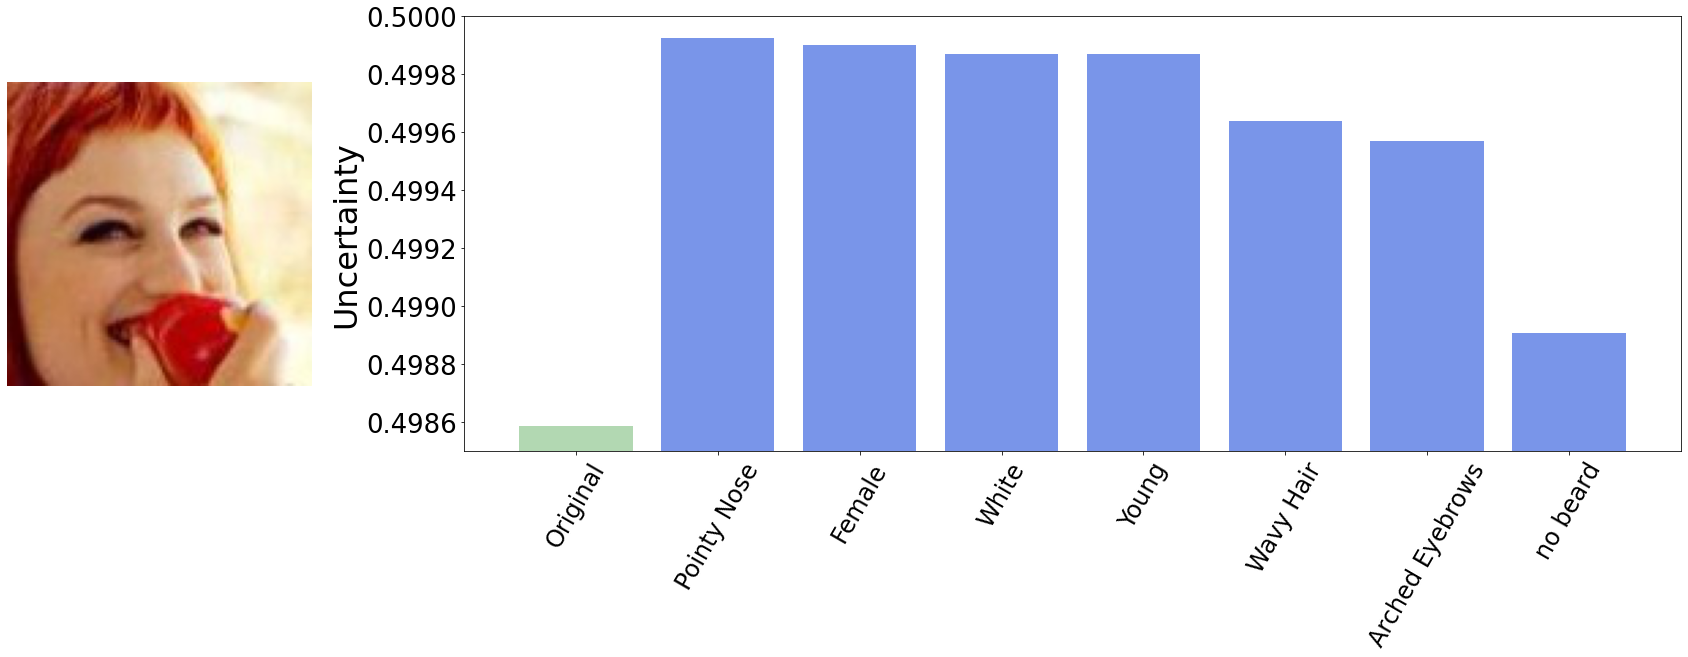

In [255]:
fig, [ax1, ax2] = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 4]}, figsize=(30,8))
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.imshow(image)

ax2.bar(attribute[0], uncertain_value[0],color="green",alpha = 0.3)
ax2.bar(attribute[1:], uncertain_value[1:],color="royalblue",alpha = 0.7)
# ax2.bar(attribute[0], uncertain_value[0], color="green",alpha = 0.2)
ax2.set_xticklabels(attribute,fontsize=24,rotation=60)
plt.ylim((round(uncertain_value.min(), 4)-1e-4, round(uncertain_value.max(), 4)+1e-4))
plt.yticks(fontsize=26)
plt.ylabel("Uncertainty",fontsize=32)

## Single Quantity

In [6]:
# -*- coding: utf-8 -*-  

"""
Created on 2022/1/13

@author: Ruoyu Chen
"""

import argparse
import cv2
import torch
import torch.nn as nn
import numpy as np
import json

import torch.nn.functional as F
from PIL import Image
from tqdm import tqdm